In [5]:
# Before we get started, run the code below if you have not ran all the code block in the previous lesson or if you think you are missing some packages

import importlib
import subprocess
import sys

def install_and_import(package):
    """
    Installs and imports a package, if it is not already installed.

    Args:
        package (str): The name of the package to install and import.
    """
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} not found, installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        importlib.import_module(package)
        print(f"{package} has been installed.")

def install_tensorflow():
    
    try:
        importlib.import_module('tensorflow')
        print(f"tensorflow is already installed.")
        return
    except:
        try:
            # Attempt to run 'nvidia-smi' to check for GPU presence
            subprocess.check_call(['nvidia-smi'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
            print("GPU detected, installing TensorFlow with GPU support...")
            tensorflow_package = 'tensorflow'  # or 'tensorflow==2.x' for specific version
        except subprocess.CalledProcessError:
            # 'nvidia-smi' not found or no NVIDIA GPU detected (this part is defunct as TF no longer has separate versions)
            print("No GPU detected, installing TensorFlow CPU-only version...")
            tensorflow_package = 'tensorflow'

    # Install TensorFlow using pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", tensorflow_package])
    print(f"{tensorflow_package} has been installed.")


# List of needed packages
packages = ['numpy', 'pandas', 'matplotlib', 'sklearn']

# Install and import each package
for package in packages:
    install_and_import(package)
    
# Install TensorFlow
install_tensorflow()

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
sklearn is already installed.
tensorflow is already installed.


We covered *a lot* of stuff in the previous lesson, but moving forward we will assume that you are familiar with these concepts and at the very least remember what stays common across all machine learning models (including deep learning).

1) A model to generate predictions

2) A model to measure the loss of those predictions compared to the actual values

3) A model to change the weights of the model to get better predictions (i.e. learning via gradient descent)

These fundamentals do not change no matter the model, and all following material will discuss ways to further optimize these models for particular use cases!

The previous lesson developed the tools required to perform machine learning via a linear regression model. We can continue to expand on this model or move on to different models.

- Since we've worked with linear regression, I will continue to use that model but will do so on more complex data and introduce some key concepts that help create a more streamlined model that is able to achieve convergence (i.e. consistent accuracy to a reasonable level) quicker than our previous model.

**One important concept that I failed to introduce earlier was that of an epoch. An epoch is a single pass through the training data.When training our model, you will see that the for loop is running multiple times, and typically once per epoch. Recall that ML relies on the fact that we repeatedly process data to get better predictions. So having a word to quantify how much processing we have done on the data is crucial to diagnosing issues with our model.**

## Training vs Testing

Upon creating a model, it is equally important to be able to test that model by giving it new cases and seeing if it performs well. In the same way that humans can intuitively guess and categorize examples of new data, the model should be able to do the same.

- Our goal is not to build a dictionary that classifies the training data deterministically, but rather to build a model that can be used to classify new data which it may not have seen before.

To achieve this, we will need to split the data into training and test sets.

- Training data is used to train the model to learn the relationships between the features and the output.

- Test data is used to evaluate the model's performance on unseen data.

When training the model some people prefer to train and test within the same iteration of the training step, others prefer to train the model independently and then test it after it has been trained.

**What is the difference between training and testing?**

When testing the data you are feeding the model inputs but you must ensure that the weights of the model do not adjust in response to these new examples. **The point of evaluating the model on the testing set is to check the model's ability to generalize to unseen data without affecting the model itself.**

### Overfitting

When training a model to learn from some data, it is important to ensure that the model is not simply memorizing the relationships in the data in the same way that you would memorize answers to a test.

**Why should we not memorize the relationships in the data?**

The goal of a model to learn the relationships between the strength of particular features and the impact they have on the resulting output, but the training data that we use to train our model may not necessarily be the same data that other users use to test our model.

**If there is bias in the data that is not present within the test data (simulated real world use), then our model will perform poorly.**

**If this bias is caused by noisy or imperfect data, then our model will learn to accomodate to that data which will result in good performance on the training data but poor performance on the test data or any properly cleaned data.**

**If the model only runs on a small batch of training data, then that dataset will not be sufficiently representative of the real world, and the model will be more prone to memorizing it.**

**Also if the model's error indicates that it is nearly 100% percent accurate on the training data, this is typically not a good sign, as it indicates that the model has memorized the data itself, not the patterns within the data.**

Ex: **If a model is made to identify animals in a picture, but the training data only consists of cats and dogs, how will the model behave when a user gives it an image of a lion hiding in the savannah?**

- Will the model categorize a lion as a cat or as a dog, or will it simply say that there is no animal in the image?

This uncertainity occurs because our training data was not representative of the real world test cases and while the model scored well on the training data, it was not well adjusted to the test data. Such a situation is referred to as **overfitting**.

We can avoid overfitting by toying with our training data to ensure that it is sufficently representative of the real world, or even artifically representative of the real world.

- What do I mean by this?: If the model is trained on image data, instead of feeding it data of the same size, give it pictures of various resolutions. Try flipping and rotating the images before feeding them, or maybe zoom in on specific parts of the image and feed those to model. Maybe even change the saturation and color of the image.

- **The model may simply be too complex for the scope of the problem. If the model is complex it will try to hone in on all the relationships it finds, even those that occur due to selection bias within the training data. Depending on the problem and model there are many ways to adjust the model on the fly to avoid making it too complex.**

- If your training data is sufficently vast, diverse, clean, and randomized, then your model will capture true patterns as opposed to finding biased "fake" relationships that may not exist as strongly or at all in the real world.

- We will also discuss more complex techniques of modifying the model itself that allow us to cut off certain weights before they end up learning or associated weak relationships / patterns in the data that may ballon up to significantly disrupt the performance of the model. (Regularization if you want to get ahead).

- You can learn about cleaning data by diving into the pandas library in Python and learning about the data science pipeline that data engineers use to give ML engineers nice and tidy data.

**Overfitting results in very good performance on training data but poor performance on testing data.**

### Underfitting

If overfitting is learning the patterns in the training data too closely, underfitting is failing to learn the actual patterns in the training data altogether.

Although diagnosing overfitting may require more careful attention to how we feed data to the model and understanding techniques of regularization, underfitting can usually be resolved by switching up models or increasing the training time (# of epochs).

Ex: Suppose a model used to identify handwritten numbers (which does exist and we will use soon enough). But we only feed it 10 examples of each digit (0-9) to learn from.

- This is an example of underfitting, because the model will not adequately learn the relationships in the training data. You could argue that if we ran through this dataset of a total of 100 images (10 per digit) several times, the model would actually overfit to the training data because it would learn the relationships in the training data through sheer memorization.

- **Although there aren't many techincal fixes for underfitting, generally having more data and more training time is a good idea as a first solution if you see it.**

- **A second solution may be to change the model to be more complex such that it is able to capture more relationships in the data (i.e. a linear regression model will not be able to capture non-linear relationships if they exist in the dataset).**

**Underfitting results in poor performance on both training and testing data.**

---

Summary

| Overfitting | Underfitting |
| ----------- | ------------ |
| Great performance on training set, poor performance on testing set | Poor performance on both training and testing set |
| May occur with models that are too complex | May occur with models that are too simple |
| May be caused by training too much on a small dataset | May be caused by training too little on a big dataset |

Fixes for underfitting:

- Change the prediction model to be more complex (more weights, different architecture)
- Less *regularization* (we will talk about this very soon)
- Add more features to the data (give the model more data to learn from)
- Add more data to the training set (increase the size of the training set)

Fixes for overfitting:

- Change the prediction model to be more simple (less weights, simpler architecture)
- More *regularization* (we will talk about this very soon)
- Remove irrelevant features from the data (give the model less data to learn from, this goes hand in hand with regularization)

And some other things you can do to improve your model that will generally make training better:

- Cleaning up the dataset
- Diversifying the datasets, both training and testing
- Apply some sort of validation step (we will talk about this soon)

I have some code below that hopefully illustrates what overfitting and underfitting looks like in 2D space.

---

### Aside

I keep talking about "complexity" even though we have not been exposed to more complex models.

Here are some questions you may have:

- With linear regression models, how can you even overfit? It is not as if the line can curve and bend to fit the data exactly,
because its a line after all!

Answer:

This is an excellent observation, for simple 2D linear regression it may be hard to imagine how you could get something like 95% percent accuracy on sufficently random data. But keep in mind that we can create polynomial models as well, and even though we didn't cover them explicitly you can imagine that complex polynomials (ex. $x^3 -4x^2 + 3x$) can and will more accurately fit data, especially non-linear data.

Furthermore, for models that operate in higher dimensions, these 'lines' of best fit become more complex accordingly, and so they can bend and curve to fit the data more exactly.

Again this is hard to visualize beyond 3D, but for 3D input (3 input variables, one output variable), we can construct not only planes but also spheres, cylinders, paraboloids, and many more shapes that generate an object that is able to fit the data more fluidly.

- Do more complex models naturally tend to be more prone to overfitting? And how can you tell if you cannot visualize them?

Answer: 

Yes, more complex models naturally tend to be more prone to overfitting because they are able to change their weights to fit the data using more precise shapes. However, the relationship between complexity and overfitting is not as straightforward as it may seem. ML engineers use methods to ensure that complex models do not overfit to the training data and often these techniques and choices may seem arbitrary. However their choices are well informed through rigorous testing and empirical analysis that is conducted at an instituitional level and with respect to their model. This is why the titles of data *scientist* and data *engineer* carry the weight that they should. The job involves testing and validating different models and testing different techniques to find the best model. If the hardest step of the job of the data scientist is to clean the data, then the hardest aspect of being a ML engineer may be to test and validate many many different models.

And to the second question, yes it is practically impossible to visualize more complex models. But if you do a deep dive into data science topics you will stumble upon topics such as PCA and SVD that allow us to rearrange the dimensionality of the data using some fancy matrix math. These techniques allow us to assess the accuracy of a model with respect to its weights more thoroughly and we can employ visual devices to see what effect different weights have on the model.

Nonetheless as someone who is relatively new myself, I also hate the fact that this world does not allow us to explicitly imagine 4D+ models. It would be a godsend for sure.

---

Degree 1 - Train Error: 0.75, Test Error: 0.86
Degree 4 - Train Error: 0.22, Test Error: 0.34
Degree 100 - Train Error: 0.73, Test Error: 0.99


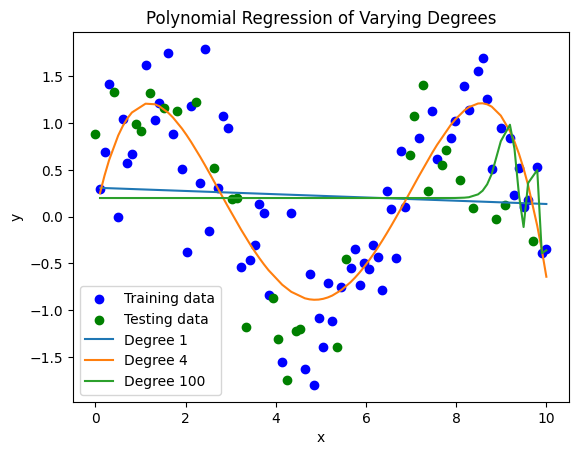

In [3]:
# For any model or line you don't understand, send me questions or read up on the modules and functions
# to get a better understanding. Whenever I read this code I make sure to draw out what exactly it is I am doing.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Seed for reproducibility
np.random.seed(0)

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=x.shape)

# Split into training and testing set (train_test_split takes in the input data and associated output data and splits
# it into batches based on the ratio provided (test_size=0.3 in this case means that 30% of the data will be used for testing))
# The random_state parameter acts similarly to a seed used in np.random, if we don't give a random state, then
# for each run we will find different data in the training and testing set. Using a seed allows consistent reproduction
# by making sure the data is shuffled in the same order for each run.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Reshape for later use in sklearn
# We are reshaping X_train and X_test from being a vectors <a, b, c> to being a column matrices [ -- a --, -- b --, -- c -- ]
# This format is required by scikit-learn's estimators, which expect 2D inputs (n_samples, n_features).
# np.newaxis is used to add a new axis, converting each vector from shape (n,) (1D array) to (n, 1) (column matrix).

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

# We can use the reshaped data to plot the training and testing data points
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Testing data')

degrees = [1, 4, 100]  # Different degrees of the polynomial

for degree in degrees:
    
    # Create polynomial features
    # Ex. If we have two input features a and b, and the degree is two, this will generate the features (for each data point): [1, a, b, a^2, ab, b^2]
    # i.e. every combination of the features to the power of the degree. For large datasets this may be very time and memory intensive.
    # but for our 100 data points, this is not an issue.
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Training on the features would typically need a training loop, but this .fit_transform() function does that for us internally.
    x_poly_train = poly_features.fit_transform(x_train)
    x_poly_test = poly_features.transform(x_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    # Predict on training and test data
    y_poly_pred_train = model.predict(x_poly_train)
    y_poly_pred_test = model.predict(x_poly_test)

    # Calculate training and test error
    train_error = mean_squared_error(y_train, y_poly_pred_train)
    test_error = mean_squared_error(y_test, y_poly_pred_test)

    # Plot results
    plt.plot(np.sort(x_train, axis=0), y_poly_pred_train[np.argsort(x_train, axis=0)], label=f'Degree {degree}')
    print(f'Degree {degree} - Train Error: {train_error:.2f}, Test Error: {test_error:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression of Varying Degrees')
plt.show()


### Discussion of the Code above

- The code above is a polynomial regression model, with the degree of the polynomial being varied.

- If the polynomial degree is one, its a simply linear model.

- The data itself is nonlinear, so we should immeadiately be able to infer that linear model will perform poorly on both training and testing data.

- As the polynomial degree increases, the model becomes more complex and more accurate on both training and testing data **to a point**. After around degree 15, the model's error seems to rebound and moreso on testing data than on training data.

- Since the model is not able to learn from the testing data, this indicates that beyond a certain degree (around 15 ish) the model is no longer able to generalize to unseen data.

While the example isn't perfect it highlights the tradeoffs and diminishing returns associated with increasing model complexity for relatively simple data. The same is true for more complex data and associated complex models.

And note that although we did not discuss polynomial models the idea behind them is relatively straightforward:

Initialize some weights randomly and take a look at the features.

Suppose there are three features: a, b, and c.

Choose a degree for the regression model, lets say we choose 2. This would limit the overall degree of each term in the polynomial to 2 or less.

The resulting features would be [1, $a$, $b$, $ab$, $ac$, $bc$, $a^2$, $b^2$, $c^2$]

Excluding the constant term (which will kind of act like our bias), for 3 features and a max degree of 2,
we generated 9 features!

**Bonus: What is the relationship between the number of base features, the degree of the polynomial regression and the number of generated features (including the linear features themselves)?**

**Answer:**

Given the number of total polynomial terms (excluding bias) is $Z$, $n$ is the number of features, and $k$ is the degree of the polynomial regression:

$Z = $ $(n + k - 1) \choose k$


---

### Quick comparison of linear vs polynomial regression

Prediction models:

- Linear regression:

$$Z = X \cdot W + b = 
\begin{bmatrix} 
x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b \\
x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b \\
x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b \\
\ldots \\
x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b
\end{bmatrix}$$

- Polynomial regression: (for the sake of simplicity, we will assume that the degree is 2, the number of linear features is 2, and the number of data points is $n$)

$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,1}^2 & x_{1,2}^2 & x_{1,1}x_{1,2} \\
x_{2,1} & x_{2,2} & x_{2,1}^2 & x_{2,2}^2 & x_{2,1}x_{2,2} \\
x_{3,1} & x_{3,2} & x_{3,1}^2 & x_{3,2}^2 & x_{3,1}x_{3,2} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_{n,1} & x_{n,2} & x_{n,1}^2 & x_{n,2}^2 & x_{n,1}x_{n,2}
\end{bmatrix}
$$

$$
W =
\begin{bmatrix}
w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \\ w_6
\end{bmatrix}
$$

$$
Z = X \cdot W + b
=
\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,1}^2 & x_{1,2}^2 & x_{1,1}x_{1,2} \\
x_{2,1} & x_{2,2} & x_{2,1}^2 & x_{2,2}^2 & x_{2,1}x_{2,2} \\
x_{3,1} & x_{3,2} & x_{3,1}^2 & x_{3,2}^2 & x_{3,1}x_{3,2} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_{n,1} & x_{n,2} & x_{n,1}^2 & x_{n,2}^2 & x_{n,1}x_{n,2}
\end{bmatrix}
\cdot
\begin{bmatrix}
w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \\ w_6
\end{bmatrix}
+ b
=
\begin{bmatrix}
x_{1,1} \cdot w_1 + x_{1,2} \cdot w_2 + x_{1,1}^2 \cdot w_3 + x_{1,2}^2 \cdot w_4 + x_{1,1}x_{1,2} \cdot w_5 + b\\
x_{2,1} \cdot w_1 + x_{2,2} \cdot w_2 + x_{2,1}^2 \cdot w_3 + x_{2,2}^2 \cdot w_4 + x_{2,1}x_{2,2} \cdot w_5 + b\\
x_{3,1} \cdot w_1 + x_{3,2} \cdot w_2 + x_{3,1}^2 \cdot w_3 + x_{3,2}^2 \cdot w_4 + x_{3,1}x_{3,2} \cdot w_5 + b\\
\ldots \\
x_{n,1} \cdot w_1 + x_{n,2} \cdot w_2 + x_{n,1}^2 \cdot w_3 + x_{n,2}^2 \cdot w_4 + x_{n,1}x_{n,2} \cdot w_5 + b
\end{bmatrix}
$$

We do not need to get into the gradient calculation or what not, but it is important to note that the process for both types of regression is the same even though the calculations may be more complex.

**Note that matrix multiplication is not commutative, so the order of the multiplication matters!**


---

## Analyzing the Performance of our Model

---

### Bias vs. Variance
Now that we have visualized the effects of overfitting and underfitting, we can talk about one technique that is often used to combat overfitting and reduce model complexity: Regularization.

To understand the impacts of regularization lets define a few terms first:

Bias: The difference between the average prediction of our model and the correct value which we are trying to predict. Models with high bias are not complex enough to capture underlying patterns correctly and thus can lead to underfitting.

Variance: The amount by which the model's predictions vary for a given data point when different samples of data are used. A model with high variance pays a lot of attention to training data and does not generalize well on new data (it’s too sensitive to fluctuations in the training set), which leads to overfitting.

To put it in a visual sense, think of a bullseye with a target in the center that represents the actual output (the output we want our prediction to land close to) and each shot to the board being a prediction:

- A model with low variance and low bias will be one where each prediction or shot will land similarly (clustered) with the other shots and the cluster as a whole will be close to the target or bullseye.(**This is the ideal model!**)

- A model with low variance but high bias will be one where each prediction or shot will land similarly (clustered) with the other shots, but the cluster as a whole will be farther from the target or bullseye. (**Consistently inaccurate but clustered predictions**)

- A model with high variance but low bias will be one where each prediction or shot will land spread out from the others, but as a whole all shots will seem somewhat equally distant from the target or bullseye. (**Somewhat accurate but inconsistent predictions**)

- A model with high variance and high bias will be one where each prediction or shot will land spread out from the others, and on the whole, all shots will have varying amounts of distance from the target or bullseye. (**Inconsistent and inaccurate predictions**)

Here is a picture of what I mean (it may remind you of precision vs accuracy from science classes but this is not related to those concepts):

<img src="./media/bias_and_variance_bullseye_analogy.jpeg" alt="drawing" width="400">

---

### Bias-Variance Tradeoff

You should remember that when we ran the code for polynomial regression earlier, for a high model complexity (polynomial degree =15 vs =18), the testing error (**AKA: validation error**) suddenly jumped. The graph below should help explain the relationship between bias, variance, model complexity, and error:

<img src="./media/bias_variance_tradeoff_graph.jpeg" alt="drawing" width="500">

As discussed prior, the optimal model is one in which we learn patterns from the training set and effectively apply them to the testing set. Ineffective models are often those that memorize the training data and then end up performing poorly in the testing data.

High variance models are those that generate wildly different predictions for inputs that should ideally have similar outputs. We say that **a model with high variance is highly sensitive to small changes in the input data**. 

- This graph shows that as the model gets more complex its ability to perform on the training data becomes better and better, but because the weights have memorized the training data they begin to perform worse and worse on the testing data, because the model has not seen the testing data (i.e. not trained on it), it struggles in the same way that a student would if they memorized a chapter but were faced with an example or problem not found within the textbook. 

- **This is all to say that memorizing is not learning, and memorizing the training data due to higher model complexity results in poor model performance on the testing set.**

- The graph also shows that for very simple models, predictions for the training and testing set are equally inaccurate. This is an area of high bias and low variance, which is to say that the predictions are all far away from the target but equally inaccurate.

- **Conversely, very simple models fail to capture enough relationships to meaningful reduce error and consequently reduce bias.**

**The sweet spot for all models is in the middle which we obtain by testing various complexities (resulting in varying bias and variance)**

---

## 


## Regularization

Regularization refers to a set of techniques that are used to prevent overfitting by artifically reducing model complexity in order to increase the performance of the model on testing (unseen) data.

- At first it may seem counterintuitive to add regularization to a model because it lessens the overall accuracy of the model (increases error) on the training data.

- But if our objective is to use the model to generate insights on new data which not follow the trends of the training data (which is almost always the case), then applying regularization introduces a bias-variance tradeoff which we discussed earlier.

- Applying regularization is as much of an art as it is a science. Depending on the problem and the constraints (i.e. how accurate you want the model to be, how many features the model should have, e.t.c) you can apply varying amounts of regularization to the model.

Visually in 2D space you can think of regularization accomplishing the following:

Before regularization

<img src="./media/2d_model_pre_regularization.png" alt="drawing" width="400">

After regularization

<img src="./media/2d_model_post_regularization.png" alt="drawing" width="400">

**While you may not think its possible to end up with a model that snakes through the data, we can see via polynomial regression that given enough polynomial terms, such complex curves are possible and actually quite frequent for super complex models!**

The orange points on the graph represent the training data and the blue points represent the testing data.

- Before regularization its clear to see that the model prioritizes minimizing the error between the predictions it makes and the orange points (the training data) and doesn't really care about the testing data (the blue points).

- After regularization, we have "straightened out" the model such that it is still relatively complex but now more generalizable to data that may occur at various points on the curve that still matches the general positive correlation between x and y.

So even if regularization ends up making the model complex, as long as the strength of the regularization is not too strong, we should see some improvement in the error associated with the testing set in exchange for slightly more error for the training set.

(My example isn't the best since the data is super spread out but here is another example which makes the tradeoff make far more sense).

Example 2:

Before regularization

<img src="./media/2d_model2_pre_regularization.png" alt="drawing" width="400">

After regularization

<img src="./media/2d_model2_post_regularization.png" alt="drawing" width="400">

The simpler model visually seems further away from some of the blue points, but paints a more clear picture of the relationship between x and y while still maintaining the same if not better error.

---

### The math behind regularization

The simplest relationship between the normal $Loss$ function and the regularization term could be a simply linear penalty which has some weight.


$$Cost = Loss + \lambda \times R$$

Before looking at the actual math behind regularization, it's important to have some motivation for what we are trying to do.

**The goal of the model is to reduce the complexity of the model indirectly. We can do this by reducing the impact of certain weights or eliminating them altogether.**

Mathematically this function should decrease in value as the value of the average value of weights goes to 0.

If we were to have the average value of weights on the x axis and the value of R on the y axis, the graph would have this general trend:

<img src="./media/regularization_general_idea_for_function.png" alt="drawing" width="400">

Lets explore each option:

Guess what two common types of functions look like this....

<details>
    <summary>Click for answer</summary>
    <p>x^2 (quadratics) and |x| (absolute value)</p>
</details>

---

Option 1: The quadratic function

Although the weights are in the form of a column matrix, they are easily represented as a vector.

$$\vec{W} = (w_1, w_2, \ldots, w_n)$$

What operation can we do on a vector that results in something the resembles the a quadratic function per weight.

Well we could simply start from the formula of the magnitude of a vector:

$$||\vec{W}|| = \sqrt{w_1^2 + w_2^2 + \ldots + w_n^2}$$

Then all we need to do to get the sum of all squared weights is to square both sides

$$R = ||\vec{W}||^2 = w_1^2 + w_2^2 + \ldots + w_n^2$$

**If you don't care to understand the behavior of this regularization term, feel free to skip all the matrix manipulation you see ahead, and don't worry about the math. What is important to know if that if $R = ||\vec{W}||^2 = \sum_{i=1}^n w_i^2$, the weights will be regularized to approach 0 but will never truly hit 0.**

- **Although we are simplifying the model by virtually eliminating the impact of some weights, the fact that we still have to calculate these miniscule weights means we have not truly simplified the model in a technical sense (we have not altogether eliminated the impact of some weights, just minimized their impact).**

---

### The math behind L2 (quadratic) regularization (skip if you don't want to understand the calculus)

To understand the behavior of this function and ensure that it behaves as intended, lets find its gradient:

$$\nabla R_w = (2w_1, 2w_2, \ldots, 2w_n)$$

This gradient indicates that as we decrease each weight, the overall impact of R, the penalty, decreases as well.

Another claim we can make is that if the weights start at some non-zero value, then they will never truly reach 0:

$$Cost = Loss + \lambda \cdot R = Loss + \lambda \cdot (w_1^2 + w_2^2 + \ldots + w_n^2) = (Y- X \cdot W) + \lambda \cdot \sum_{i=1}^n w_i^2$$

$$

(Y - X \cdot W)^2 + \lambda \cdot \sum_{i=1}^n w_i^2 = 

\begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}^2

+ 
\lambda \cdot \sum_{i=1}^n w_i^2 = 0

$$

From here we need to obtain the gradient of the cost with respect to each weight:

Here is an example for $w_1$:

$$\frac{\partial Cost}{\partial w_1} =
2
 \begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}
\begin{bmatrix}
-x_{1, 1} \\
-x_{2, 1} \\
-x_{3, 1} \\
\ldots \\
-x_{n, 1}
\end{bmatrix}
+ 
\lambda \cdot 2w_1
$$

Now looking at this partial derivative, how is it possible to zero it out?

$$\frac{\partial Cost}{\partial w_1} =
2
 \begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}
\begin{bmatrix}
-x_{1, 1} \\
-x_{2, 1} \\
-x_{3, 1} \\
\ldots \\
-x_{n, 1}
\end{bmatrix}
+ 
\lambda \cdot 2w_1
=
0
$$

Step 1: Pull out negatives from the column matrix of features

$$\frac{\partial Cost}{\partial w_1} =
-2
 \begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}
\begin{bmatrix}
x_{1, 1} \\
x_{2, 1} \\
x_{3, 1} \\
\ldots \\
x_{n, 1}
\end{bmatrix}
+ 
\lambda \cdot 2w_1
=
0
$$

Step 2: Add the whole big shabang of matrix math to both sides:

$$
\lambda \cdot 2w_1 =
2
 \begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}
\begin{bmatrix}
x_{1, 1} \\
x_{2, 1} \\
x_{3, 1} \\
\ldots \\
x_{n, 1}
\end{bmatrix}
$$

Step 3: Divide both sides by $2\lambda$:

$$
w_1 =
\frac{1}{\lambda}
\begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}
\begin{bmatrix}
x_{1, 1} \\
x_{2, 1} \\
x_{3, 1} \\
\ldots \\
x_{n, 1}
\end{bmatrix}
$$

Assuming that $\lambda > 0$. the only way the right hand side can be 0 is if the error predictions are all 0, or if the inputs associated with the first weight are all 0. The first situation is
unlikely because our initial model starts out randomly and will keep tuning but it should never be 100% accurate UNLESS the dimensionality of the data is very close or greater to the number of data points we have (i.e. we have 50 features but only 10 data points). And case 2 of the features all being 0 is also basically impossible.

---

Option 2: The absolute value function (L1 regularization)

Now even though there is no standard vector operation that goes about finding the absolute value of each weight in the weight vector, we can simply create our own function.

For the weight vector $\vec{w}$, which has $m$ elements corresponding to each feature, we can define the absolute value function as:

$$
R(\vec{w}) = \sum_{i=1}^m | \vec{w}_i | = | w_1 | + | w_2 | + \ldots + | w_m |
$$

This would make our overal cost function look like:

$$
Cost = Loss + \lambda \cdot R = Loss + \lambda \cdot (| w_1 | + | w_2 | + \ldots + | w_m |) = (Y- X \cdot W)^2 + \lambda \cdot \sum_{i=1}^m | w_i |
=
\begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}^2
+
\lambda \cdot \sum_{i=1}^m | w_i |
$$

**In this case (L1 regularization) its is possible for some of the weights to be completely 0ed out (which is not possible in the case of L2 regularization).**

- **If you don't care to understand the behavior of this regularization term, feel free to skip all the matrix manipulation you see ahead, and don't worry about the math.**

---

### The math behind L1 regularization (skip if you don't want to understand the calculus)

Lets simply focus on the Regularization term and ignore the gradient calculations for the error portion of the loss.

$$
\frac{\partial R}{\partial w_1} = \lambda \cdot \frac{|w_1|}{w_1}
$$

First note that the factional term: $\frac{|w|}{w}$ is undefined at 0. This is problematic for our calculations and may lead to a runtime error within our python code. To fix this issue lets first examine the behavior of this term and recontextualize it as its own function.

$\frac{|w_1|}{w_1} = -1$ if $w < 0$

$\frac{|w_1|}{w_1} = 1$ if $w > 0$

And based on our artifical behavior:

$\frac{|w_1|}{w_1} = 0$ if $w = 0$

Obviously this term always returns the sign of $w_1$ or 0 if $w_1 = 0$, so lets call this function $sign(x)$

$$
\frac{\partial R}{\partial w_1} = \lambda \cdot sign(w_1)
$$

Note that this regularization term will only be 0 when $w_1$ is equal to 0, but if we compare it to the regularization term for L2 regression: $\lambda \cdot 2w_1$, the strength of this term is not dependent on the magnitude of the weight.

What I mean by this is if you plug in 0.0001 and 0.001 into the L1 regularization term, for the same value of $\lambda$, you get $\lambda$ as your output. This effect is also present with negative weights (try plugging in -0.0001 and -0.001).

- **Whereas the L2 regularization term penalizes proportionally to the magnitude of the weight, the L1 regularization term punishes all weights of the same sign equally. (output is always 0, $-\lambda$, or $\lambda$)**

- What this means is that the weights have the potential to actually hit 0 rather than accumulating diminishing returns in finite loops over the dataset.

---

## Summary

If our model uses L2 regularization our overall prediction model looks like:

$$
Cost = 
\begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}^2
+ 
\lambda \cdot \sum_{i=1}^n w_i^2 = 0
$$

If our model uses L1 regularization our overall prediction model looks like:
$$
Cost = 
\begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}^2
+ 
\lambda \cdot \sum_{i=1}^n |w_i| = 0
$$

**L2 regularization is often called Ridge regularization.**

**L1 regularization is often called Lasso regularization.**

**We like to say that L1 regularization encourages sparsity in our model, i.e. it removes some weights and makes the model more 'sparse'. L2 regularization does not accomplish this, it prioritizes smoothness over sparsity.**

---

### Quick reasoning for the objectives of L1 and L2 regularization:

- We employ regularization to reduce multicolinearity in our model. Multicolinearity refers to the a trend we observe when some of our features begin to cluster and line up a bit too closely with each other. This implies that a tight relationship between the colinear variables which results in an overall more rigid and overfitted model.

Visually this is what I mean:

<img src="./media/multicolinearity_basics.png" alt="drawing" width="400">

This image shows a model with 4 weights. If we plot each datapoint in the training set as a function of its corresponding features it becomes clear that there is a strong correlation between $x_1$ and $x_2$, but not as strong as the correlation between $x_3$ and $x_4$. **We would say that $x_1$ and $x_2$ are colinear, and if we drew a 3D graph that shows a similar linear pattern but for 3 features instead of two, we would say that they are all multicolinear. Multicolinearity is just colinearity expanded into more than two dimensions.**

Why do we not want colinearity in our model?:

- If you take a statistics class you eventually learn that having a linear regression model that exhibits multicolinearity produces highly variant outputs for similar new inputs (i.e. high variance for test data).
- So by applying regularization our objective of reducing overfitting is achieved by reducing multicolinearity in our model (they are identical concepts but approached differently in statistics vs. machine learning).

- Applying L2 regularization (ridge regression) smooths out these nearly perfect looking linear relationships ("ridges") into more smoother and less correlated relationships.

- The name "lasso" for L1 regularization comes from the statistics technique: *L*east *A*bsolute *S*hrinkage and *S*election *O*perator. Without getting into the weeds of the statistics world, we can say that L1 regularization employs a shrinkage technique akin to LASSO, which can shrink weights to 0 (unlike L2 regularization) which achieves the same effect as ridge regression.

---

Below is some code to help visualize the impacts of L1 and L2 regularization:


/home/kelpfries/miniconda3/envs/mlshit/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.309e+00, tolerance: 5.291e-03
  model = cd_fast.enet_coordinate_descent(


Errors for regular model, train error: 0.26, test error: 0.52
Errors for L1 model, train error: 0.21, test error: 0.33
Errors for L2 model, train error: 2.80, test error: 2.70


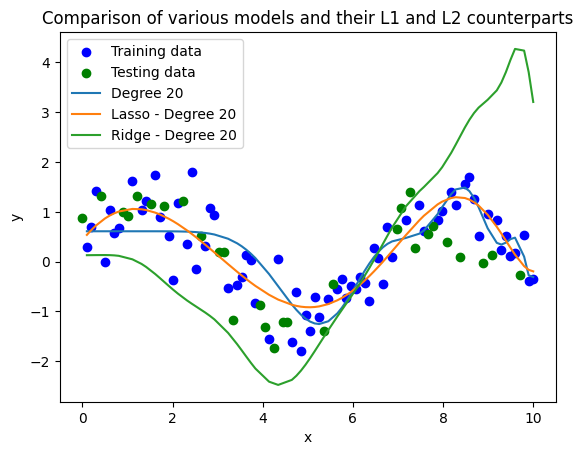

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Seed for reproducibility
np.random.seed(0)

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=x.shape)

# Split into training and testing set (train_test_split takes in the input data and associated output data and splits
# it into batches based on the ratio provided (test_size=0.3 in this case means that 30% of the data will be used for testing))
# The random_state parameter acts similarly to a seed used in np.random, if we don't give a random state, then
# for each run we will find different data in the training and testing set. Using a seed allows consistent reproduction
# by making sure the data is shuffled in the same order for each run.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Reshape for later use in sklearn
# We are reshaping X_train and X_test from being a vectors <a, b, c> to being a column matrices [ -- a --, -- b --, -- c -- ]
# This format is required by scikit-learn's estimators, which expect 2D inputs (n_samples, n_features).
# np.newaxis is used to add a new axis, converting each vector from shape (n,) (1D array) to (n, 1) (column matrix).

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

# We can use the reshaped data to plot the training and testing data points
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Testing data')

degrees = [20]  # Different degrees of the polynomial

for degree in degrees:
    
    # Create polynomial features
    # Ex. If we have two input features a and b, and the degree is two, this will generate the features (for each data point): [1, a, b, a^2, ab, b^2]
    # i.e. every combination of the features to the power of the degree. For large datasets this may be very time and memory intensive.
    # but for our 100 data points, this is not an issue.
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Training on the features would typically need a training loop, but this .fit_transform() function does that for us internally.
    x_poly_train = poly_features.fit_transform(x_train)
    x_poly_test = poly_features.transform(x_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    # Fit a linear regression model with L2 regularization
    ridge_model = Ridge(max_iter=10000)
    ridge_model.fit(x_poly_train, y_train)

    # Fit a linear regression model with L1 regularization
    lasso_model = Lasso(alpha=0.0001, max_iter=10000)
    lasso_model.fit(x_poly_train, y_train)

    # Predict on training and test data
    y_poly_pred_train = model.predict(x_poly_train)
    y_poly_pred_test = model.predict(x_poly_test)
    
    l1_poly_pred_train = lasso_model.predict(x_poly_train)
    l1_poly_pred_test = lasso_model.predict(x_poly_test)
    
    l2_poly_pred_train = ridge_model.predict(x_poly_train)
    l2_poly_pred_test = ridge_model.predict(x_poly_test)
    

    # Calculate training and test error
    train_error = mean_squared_error(y_train, y_poly_pred_train)
    test_error = mean_squared_error(y_test, y_poly_pred_test)
    
    l1_train_error = mean_squared_error(y_train, l1_poly_pred_train)
    l1_test_error = mean_squared_error(y_test, l1_poly_pred_test)
    
    l2_train_error = mean_squared_error(y_train, l2_poly_pred_train)
    l2_test_error = mean_squared_error(y_test, l2_poly_pred_test)

    # Plot results
    
    plt.plot(np.sort(x_train, axis=0), y_poly_pred_train[np.argsort(x_train, axis=0)], label=f'Degree {degree}')
    plt.plot(np.sort(x_train, axis=0), l1_poly_pred_train[np.argsort(x_train, axis=0)], label=f'Lasso - Degree {degree}')
    plt.plot(np.sort(x_train, axis=0), l2_poly_pred_train[np.argsort(x_train, axis=0)], label=f'Ridge - Degree {degree}')
    
    print(f'Errors for regular model, train error: {train_error:.2f}, test error: {test_error:.2f}')
    print(f'Errors for L1 model, train error: {l1_train_error:.2f}, test error: {l1_test_error:.2f}')
    print(f'Errors for L2 model, train error: {l2_train_error:.2f}, test error: {l2_test_error:.2f}')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of various models and their L1 and L2 counterparts')
plt.show()

When experimenting with different polynomial degrees, it becomes evident that regularization does not uniformly enhance model performance. This variability can be attributed to the fact that excessive regularization can cause underfitting, particularly evident in models regulated heavily with L1 regression.

**Experimenting with Polynomial Degrees:**
Try polynomial degrees such as 5, 10, 15, 20, 25, 30, and 35. Record observations and consider graphing pairs or triplets of results for clarity. High-degree polynomials, combined with regularization, often lead to surprising patterns of underfitting or overfitting.

**Applying Regularization:**
- Regularization, by introducing penalties on the size of coefficients, helps mitigate overfitting. This is crucial for models dealing with high-dimensional data but can lead to underfitting if over-applied.
- Simple datasets with clear linear relationships might not need regularization. Conversely, datasets exhibiting complex, nonlinear patterns may benefit from both sophisticated models and careful regularization.

**Choosing Model Complexity:**
As datasets grow in complexity, the transition from linear models to more sophisticated ones, such as neural networks, should be considered. However, the choice of model should be driven by the specific requirements of the data and the task at hand, balancing complexity against performance and interpretability.

**Conclusion:**
Regularization is a powerful tool in a data scientist's arsenal, suitable for controlling model complexity and preventing overfitting. However, its application should be tailored to the specific characteristics of the dataset and the predictive task to optimize model performance.

Other models apart from regression (linear or polynomial) will be used in the future, but the models presented here are fundamental to the topic of regularization and the best introduction to ML (in my opinion).

- Deep learning is a subsection of ML that is heavily based on neural networks which are a different type of model entirely, but as emphasized at the beginning of the lesson, the same components apply:

1) A model to generate predictions (neural networks)

2) A model to measure the loss of those predictions compared to the actual values (sigmoid or binary cross-entropy)

3) A model to change the weights of the model to get better predictions (i.e. learning via gradient descent)

You shouldn't know what any of these terms mean but it's reassuring to know that the building blocks of any ML model are the same.